#  Importation

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [164]:
df_isie=pd.read_excel('DATA/elections19.xlsx')


In [241]:
isie_sorted = df_isie.sort_values(by="Nombre d'inscrits",ascending=False )
isie_sorted.head()

,>60F,>60H,45-60F,45-60H,26-45F,26-45H,18-25F,18-25H,Nombre d'inscrits,Nombre de bureau de vote,Délégation,Région
0,8602,8835,11110,10219,19281,17317,6016,5876,87256,22,Ariana Medina,Ariana
207,6313,6876,8937,10417,14640,14897,5879,6306,74265,21,Sfax Medina,Sfax 2
206,5679,7297,8540,9701,14115,14673,4932,5272,70209,25,Sfax Sud,Sfax 2
205,6046,6878,8287,9226,14809,14792,4564,4762,69364,18,Sfax Ouest,Sfax 2
198,5034,6468,8193,9397,13718,14166,4866,4776,66618,23,Sakiet edaer,Sfax 1


# **Nombre des délégations par région**

In [246]:
deleg_reg = isie_sorted.groupby('Région')['Délégation'].count()
tot_deg = deleg_reg.sum()
df_deleg_reg = pd.DataFrame({"Délégation": deleg_reg,"%":round(100*deleg_reg / tot_deg,1)})
df_deleg_reg.sort_values(by="%",ascending=False )


,Délégation,%
Région,,
Sousse,16,5.8
Bizerte,14,5.1
Kairouan,13,4.7
Sidi Bouzid,13,4.7
Kasserine,13,4.7
Monastir,13,4.7
Gafsa,13,4.7
Le Kef,12,4.4
Ben Arous,12,4.4


In [242]:
tot_deg

274

✅**Il faut avoir 274 comités locales pour assurer une représentation nationale totale**

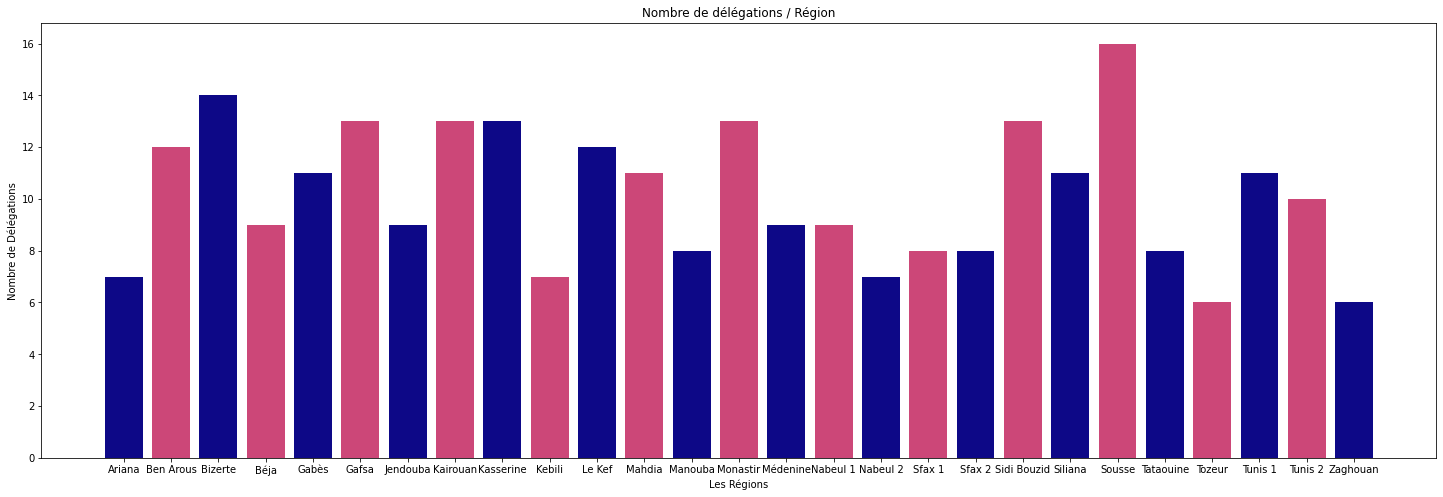

In [225]:
fig, ax = plt.subplots(figsize=(25,8))
p = plt.get_cmap('plasma')
plt.bar(list(df_deleg_reg.index),df_deleg_reg['Délégation'],color=c,tick_label=df_deleg_reg.index)
plt.title('Nombre de délégations / Région')
plt.xlabel('Les Régions')
plt.ylabel('Nombre de Délégations') 
plt.show()



1.   Sousse avec 16 Délégations (5.8%)
2.   Bizerte avec 14 Délégations (5.1%)



#**Nombre des inscrits par région** : 





In [226]:
inscrits_reg = isie_sorted.groupby('Région')["Nombre d'inscrits"].sum()

In [227]:
tInscrits_reg = pd.DataFrame({"Inscrits": inscrits_reg})
tInscrits_reg = tInscrits_reg.sort_values(by="Inscrits",ascending=False )
#tInscrits_reg


Text(0.5, 1.0, "Nombre d'inscrits par région")

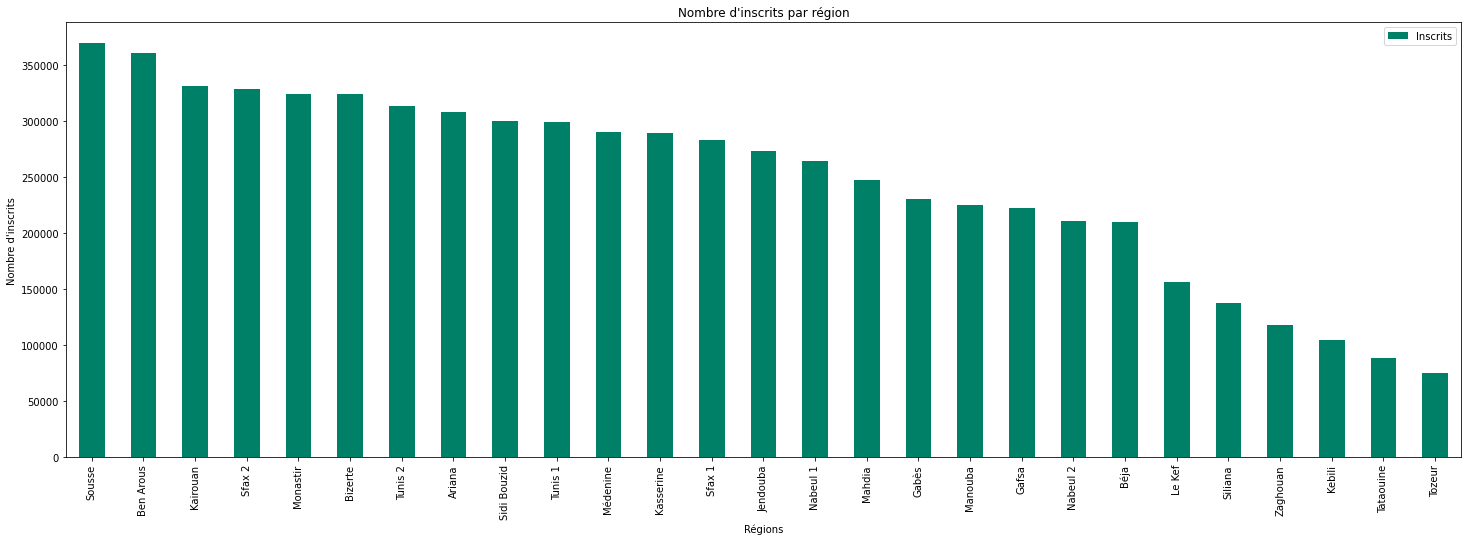

In [228]:
tInscrits_reg.plot(kind='bar',figsize=(25,8),cmap='summer');
plt.xlabel('Régions')
plt.ylabel("Nombre d'inscrits")
plt.title("Nombre d'inscrits par région")


# **Comparaison entre le nombre de délégation/région et le nombre d'inscrits**

In [223]:
deleg_reg = df_isie.groupby('Région')['Délégation'].count()
inscrits = df_isie.groupby('Région')["Nombre d'inscrits"].sum()
comparaison_deleg_insc = pd.DataFrame({"Délégations": deleg_reg,
                                        "Nombre d'inscrits": inscrits})
top10_deleg_insc = comparaison_deleg_insc.sort_values(by="Nombre d'inscrits",ascending=False).head(10)
top10_deleg_insc

,Délégations,Nombre d'inscrits
Région,,
Sousse,16,369842
Ben Arous,12,361187
Kairouan,13,331016
Sfax 2,8,328777
Monastir,13,324703
Bizerte,14,324383
Tunis 2,10,314034
Ariana,7,308006
Sidi Bouzid,13,300240


#**Nombre des inscrits par tranche d'age** :



In [230]:
pls60=isie_sorted.groupby('Région')['>60F'].sum()+df_isie.groupby('Région')['>60H'].sum()
bet45_60=isie_sorted.groupby('Région')['45-60F'].sum()+df_isie.groupby('Région')['45-60H'].sum()
bet26_45=isie_sorted.groupby('Région')['26-45F'].sum()+df_isie.groupby('Région')['26-45H'].sum()
bet18_25=isie_sorted.groupby('Région')['18-25F'].sum()+df_isie.groupby('Région')['18-25H'].sum()
df_age = pd.DataFrame({">60": pls60,"]45-60]": bet45_60,"[26-45]": bet26_45,"[18-25]":bet18_25})
df_age

,>60,]45-60],[26-45],[18-25]
Région,,,,
Ariana,55532,80265,132869,39340
Ben Arous,65949,99390,150660,45188
Bizerte,65512,86291,131420,41160
Béja,42898,53820,85939,27233
Gabès,39814,55424,101402,34034
Gafsa,34891,53453,100857,32953
Jendouba,57846,65561,110358,39620
Kairouan,54626,77653,147761,50976
Kasserine,43673,61614,136423,47834


# **Nombre des inscrits par genre**

In [240]:
femmes_reg=isie_sorted.groupby('Région')['>60F'].sum()+df_isie.groupby('Région')['45-60F'].sum()+isie_sorted.groupby('Région')['26-45F'].sum()+isie_sorted.groupby('Région')['18-25F'].sum()
hommes_reg=isie_sorted.groupby('Région')['>60H'].sum()+df_isie.groupby('Région')['45-60H'].sum()+isie_sorted.groupby('Région')['26-45H'].sum()+isie_sorted.groupby('Région')['18-25H'].sum()
pd.DataFrame({"Femmes": femmes_reg,
              "Hommes" : hommes_reg,
              "Total": inscrits_reg,
              "% Femmes": 100*femmes_reg / inscrits_reg,
              "% Hommes": 100*hommes_reg / inscrits_reg,
              })

,Femmes,Hommes,Total,% Femmes,% Hommes
Région,,,,,
Ariana,153575,154431,308006,49.861042,50.138958
Ben Arous,179862,181325,361187,49.797473,50.202527
Bizerte,162338,162045,324383,50.045163,49.954837
Béja,105473,104417,209890,50.251560,49.748440
Gabès,116652,114022,230674,50.570069,49.429931
Gafsa,110005,112149,222154,49.517452,50.482548
Jendouba,136515,136870,273385,49.935073,50.064927
Kairouan,159460,171556,331016,48.172898,51.827102
Kasserine,142098,147446,289544,49.076479,50.923521


# **Analyse locale pour la région de Sousse**

In [ ]:
df_insc_sousse = df_isie[(df_isie.Région == 'Sousse')]
df_insc_sousse

,>60F,>60H,45-60F,45-60H,26-45F,26-45H,18-25F,18-25H,Nombre d'inscrits,Nombre de bureau de vote,Délégation,Région
165,1411,1753,2489,2832,4076,3938,1318,1110,18927,9,Akouda,Sousse
166,1090,1353,2007,2401,4083,4083,1311,1111,17439,7,Zaouiet Sousse-Kesiba-Thrayat,Sousse
167,1383,1688,2466,2845,4225,4152,1342,1198,19299,9,Kalaa Soghra,Sousse
168,1771,2617,3188,4083,6803,7272,2245,1954,29933,16,Kalaa Kobra,Sousse
169,2100,2639,3128,3420,6312,6861,2194,2138,28792,21,Enfidha,Sousse
170,1197,1491,1745,2042,3319,3369,1018,867,15048,13,Bouficha,Sousse
171,2249,2614,3831,4112,7140,6397,2028,1654,30025,8,Hamem Sousse,Sousse
172,2486,3108,4204,3885,9199,8650,2221,2002,35755,11,Sousse Riadh,Sousse
173,2253,2491,3329,3655,5378,5125,1761,1810,25802,7,Sousse Medina,Sousse
174,3741,4308,5953,5616,10114,8591,2751,2358,43432,13,Sousse Jawhara,Sousse
